# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [178]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print "\nBasic statistics of given data\n", data.describe()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185

Basic statistics of given data
               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73

##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

The objective of the Feature transformation is to consider all given features and to arrive at reduced number of features either at the order of high variance (PCA) or by converting the input features into entirely a new set of features which are mutually exclusive in their properties (ICA).

In our dataset, 
PCA- Dimenionality reduction happens with respect choosing the principle componenets with high variations of data points in the given data. The more variant the date are in one particular direction ,they will be chosen first as they represent most information in the dataset. Then the second component with less variance than the first one consiered next. Thus with respect to level of variance as high spread the data is, the PCA reduces the number of features to less.

ICA- Independent Componenet Analysis works to reduce the number of features in such a way ,the reduced features have mutually exclusive properties, i.e. they dont share any common observables. This new features are made up features from the given input features.

###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


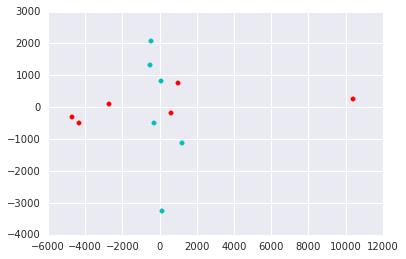

In [179]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
n = min(data.shape)
pca = PCA(n_components=n)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_
first_pc=pca.components_[0]
second_pc=pca.components_[1]
third_pc=pca.components_[2]
transformed_data=pca.transform(data)
for ii,jj in zip(transformed_data, data):
    plt.scatter(first_pc[0]*ii[0],first_pc[1]*ii[1],color="r")
    plt.scatter(second_pc[0]*ii[0],second_pc[1]*ii[1],color="c")
#plt.scatter(third_pc[0]*ii[0],third_pc[1]*ii[1],color="b")

#plt.scatter(jj[0],jj[1],color="b")

#plt.scatter(xrange(1,n+1), pca.explained_variance_ratio_)
#plt.xlabel('Dimension', size=15)
#plt.ylabel('Variance', size=15)
#plt.ylim(0)

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

PCA results in the first 2 componenets with very high variance whereas after the second componenet, the variance decreases drastically for third componenet and so on. The fraction of influence of first 2 dimensions combinely are  0.45961362  and 0.40517227, totalling more than 86% of total variance. 

Total spread over among all the dimensions , these first 2 dimensions themseleves carry more than 86% of the total spread. Remaining 4 dimensions carry in total of 14% with small reductions from 3rd on.

So, i would choose the first 2 number of componenets if i have to. It may benefit for analysis choosing more number of dimensions, but that may overfit in testing test.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

These dimensions represent the vectors which all are the combinations of multiple input features when projecting from one direction for example. Its exactly looking at the data points on the space, and inserting a hyperplane which has closer distance to most of the data points in our dataset. In our customers dataset, we found using PCA that there can be 2 such dimensions (planes) which can represent the most variance of our data. By doing so, essentially we are bringing down the 6 dimensional spaces into 2 dimensional spaces (6 features in our case) which can represent most of the information of a given data (86% in our case). In this way, we are computationally inexpensive without loosing much information.

First Principle component has co-efficients as follows:
    Fresh	            -0.97653685
    Milk	            -0.12118407
    Grocery	            -0.06154039
    Frozen	            -0.15236462
    Detergents_Paper	 0.00705417
    Delicatessen	    -0.06810471
    
    
The first principle componenet is more of very closely depicting the 'Fresh' products as the co-efficienct is very less with respect to new PCA which is first with maximum variance. It is likely that more consumers tend to by default are buying 'Fresh' products among all.

Second Principle component has co-efficients as follow:
    Fresh	              -0.11061386
    Milk	               0.51580216
    Grocery	               0.76460638
    Frozen	              -0.01872345
    Detergents_Paper	   0.36535076
    Delicatessen	       0.05707921
    
As we can see the second principle components primarily consists of information pertaining to Milk,Grocer and Detergents as they score 0.51580216, 0.76460638,0.36535076 respectively. This second dimension shows consumers in an average around 40% were buying the products which is a combination of Milk, Grocer and Detergents.

By considering both of the above 2 principle components, Frozen and Delicatessen are bought very less and negligibly influence our decisions.

###ICA

In [180]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
data_scaled = scale.fit_transform(data)

n = min(data.shape)
ica = FastICA(n_components=n, random_state=42)
ica.fit(data_scaled)

# Print the independent components
print ica.components_

[[-0.0109083  -0.00108579  0.00730777  0.05405594 -0.00254136 -0.01675677]
 [ 0.00253788 -0.0123283   0.06912878  0.00142375 -0.01374853 -0.00544097]
 [-0.00490605 -0.00153897 -0.00562146 -0.002525    0.00238444  0.05092947]
 [-0.00336282  0.01863001  0.10899024 -0.00723244 -0.13338644 -0.0160228 ]
 [-0.05026646  0.00647203  0.00748246  0.00322414 -0.01147139  0.0027079 ]
 [-0.00193854 -0.07245463  0.05647623  0.0016736  -0.0171404   0.01695592]]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
IC1,-0.010908,-0.001086,0.007308,0.054056,-0.002541,-0.016757
IC2,0.002538,-0.012328,0.069129,0.001424,-0.013749,-0.005441
IC3,-0.004906,-0.001539,-0.005621,-0.002525,0.002384,0.050929
IC4,-0.003363,0.018630,0.108990,-0.007232,-0.133386,-0.016023
IC5,-0.050266,0.006472,0.007482,0.003224,-0.011471,0.002708
IC6,-0.001939,-0.072455,0.056476,0.001674,-0.017140,0.016956


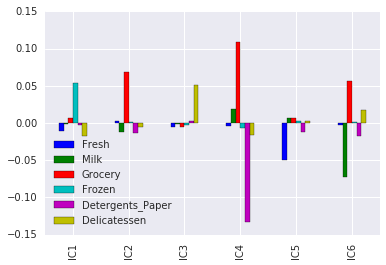

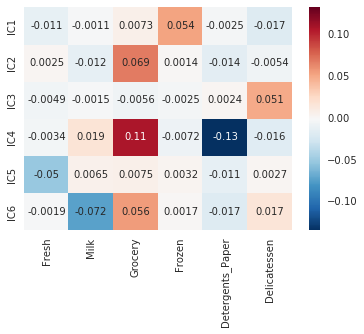

In [181]:
# Print the independent components
from IPython.display import display
import seaborn as sns

ica_df = pd.DataFrame(ica.components_, columns=list(data.columns), index=["IC1","IC2","IC3","IC4","IC5","IC6"])

display(ica_df)
ica_df.plot(kind = 'bar')
plt.figure()
sns.heatmap(ica_df, annot=True)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 
The vectors values which we found are those with highly independent statistical hidden variables. In our dataset, the observables are:

    Fresh	              
    Milk	              
    Grocery	              
    Frozen	              
    Detergents_Paper	  
    Delicatessen	      
    
    The hidden variables (Independent Component Analysis coefficients) contains the varying information levels of each observable combined together.
  
The 1st Independent component:
This independent component shows that there are more customers buying Frozen food and very less customers buy Delicatesan Food.

The 2nd independent component:
This Independent component has the information that Grocery products are most bought and very very little of Detergents_paper.

The 3rd independent component:

This Independent component shows the information where the Delicatessen products are bought more in comparison. Remaining products are bought in similar quantities.

The 4th independent component:

This independent component is similar to IC2 where there are more of Grocery products are bought. In comparision , Detergents and paper products are bought less.

The 5th independent component:
This Independent component is a collection of information where all of the products except Fresh products are bought in similar quantities.

The 6th independent component:
This independent component shows that , it has more information about Grocery product which is bought at high quantity and Milk products least.

From the above inferences we can note the following:

1.Customers who buy lot of groceries, often dont buy Detergents_paper together. This is also applicable closely to Milk. These type of customers are likely to be owning Groceries shops as their main business.(IC2, IC4 & IC6)

2. Customers who buy Delicatessens or Frozen products dont often buy anything else at all. They shows no interest in any other products if they are either Frozen products customers or the customers who buy a prepared food/delicacies.(IC2 & IC3)

3. There is a type of consumers who all are small scale owners who buy stuff to keep for long time and sell. They hardle buy Fresh stuff. (IC5)

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

K Means clustering comes with the following advantages:

1. The scalability is high.i.e.it can be used for large number of samples.
2. General Purpose
3.K-means clustering is usually more eﬃcient run-time wise (2)
4.Inexpensive in comparison to other clustering methods (3)

(1).http://scikit-learn.org/stable/modules/clustering.html#clustering
(2). https://www.quora.com/What-are-the-pros-and-cons-of-kmeans-vs-hierarchical-clustering
(3) http://stats.stackexchange.com/questions/58855/why-do-we-use-k-means-instead-of-other-algorithms


GMM comes with the limitaton of scalability with number of parameters to make the categorization as complex.(1)

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [182]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [183]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data) # Transforming the data to a Cluster Distance space
reduced_data_df = pd.DataFrame(reduced_data[:10])  # print upto 10 elements
print reduced_data_df

              0             1
0   -650.022122   1585.519090
1   4426.804979   4042.451509
2   4841.998707   2578.762176
3   -990.346437  -6279.805997
4 -10657.998731  -2159.725815
5   2765.961593   -959.870727
6    715.550892  -2013.002266
7   4474.583667   1429.496972
8   6712.095397  -2205.909156
9   4823.634354  13480.559205


In [184]:
reduced_data.shape

(440L, 2L)

###Choosing the number of Clusters:

There are various thoughts and ways in finding out or arriving at the number of clusters for our dataset.

By default, the number of clusters are 8 in 'k-means'. Using 8 number of clusters (as minimum) will provide intuitiveley conflicting categories if we use the default number of clusters which is bigger than the number of products consumers buy. This will lead to difficuly in uncovering the categories of customers.

One of the best way to find the number of clusters is to increase the number of clusters from smaller value i.e. value of 'k' until the points assigned to each cluster have a Gaussian distribution (1,2). In our case, we chose 2 PCA's representing more than 85% of our data. So to choose reasonably, it is good to start with 2 clusters and observe.


(1) http://stackoverflow.com/questions/1793532/how-do-i-determine-k-when-using-k-means-clustering
(2).http://papers.nips.cc/paper/2526-learning-the-k-in-k-means.pdf

In [185]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
#Implementing K means clustering
import time
n_clusters = 3
start = time.time()
clusters = KMeans(n_clusters=n_clusters).fit(reduced_data)
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [186]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [187]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids=clusters.cluster_centers_
print centroids

[[-23978.86566553  -4445.56611772]
 [  4165.1217824   -3105.15811456]
 [  1341.31124554  25261.39189714]]


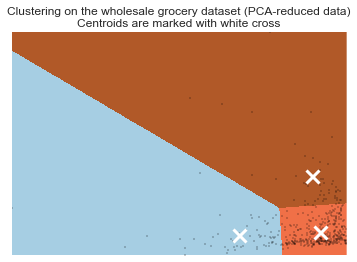

In [188]:
# Put the result into a color plot
# Voronoi diagram
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [189]:
# identify which customers are in which cluster
x = data['Cluster'] = clusters.predict(reduced_data)

# print cluster sample counts and averages
for i in xrange(clusters.n_clusters):
    count = data[x==i].shape[0]
    print 'There are %s samples in Cluster %s' % (count, i)
    print 'Here is what a Cluster %s customers buys from the wholesale distributor:' % i
    print data[x==i][list(data.columns[:-1])].mean(),'\n'

There are 60 samples in Cluster 0
Here is what a Cluster 0 customers buys from the wholesale distributor:
Fresh               35941.400000
Milk                 6044.450000
Grocery              6288.616667
Frozen               6713.966667
Detergents_Paper     1039.666667
Delicatessen         3049.466667
dtype: float64 

There are 329 samples in Cluster 1
Here is what a Cluster 1 customers buys from the wholesale distributor:
Fresh               8249.996960
Milk                3800.966565
Grocery             5248.556231
Frozen              2571.677812
Detergents_Paper    1755.112462
Delicatessen        1137.018237
dtype: float64 

There are 51 samples in Cluster 2
Here is what a Cluster 2 customers buys from the wholesale distributor:
Fresh                8027.411765
Milk                18375.921569
Grocery             27342.549020
Frozen               2014.313725
Detergents_Paper    12314.607843
Delicatessen         2233.254902
dtype: float64 



**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

There are 3 clusters identified in our case which covers the different categories of customers:

Cluster-0: This represents the customers who all are buying more of Fresh products. This cluster is likely to represent the Principle component-1 (PCA-1). They buy other products relatively low in quantity.

Cluster-1: This cluster/type of customers as well overall purchasing the fresh food in maximum quantity in addition to buying other categories of products as well. With fresh products they buy grocery,milk, and frozen with least of Detergents_paper and Delicatessen. These type of customers are likely to be running medium size shops. They are most likely to be restaurants which buy Fresh, grocery, milk as most of all.

Cluster-2: This type of customer is buying more of Grocery followed by Milk,Detergents_paper.They buy least of Frozen and Delicatessen. These customers are mostly running small cafe in combination with sandwic/takeaway food shops.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 
1. Out of all the above techniques, k-means clustering in combination with PCA gives an understanding of different types of customers and the type of products they buy.

2. It segregates the types of customers into reasonably understandable categories such as Restaurants, Small cafes/Take away shops.

3. When using only PCA, even though the first component (~45%) shows the most customers belong to the category buying fresh products, the second principle component is spread over across the remaining products giving no clues about how best the customers can be categorized.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

Since our first category of customers falls into mostly consuming the Fresh products, their experience is likley to remain when the delivery time is changed from morning to noon/evening. But that should be regular as the Fresh products are consumed sooner than other frozen/storable products.

Second category which has a huge sampeles of customers base where most times they are likely to be restaurants with considerable revenues base. They counsume more of Fresh products and at the same time a considerable and close quantity of Grocery, Milk, Frozen and so on from high order to low order. It can be inferred that, these customers buy products very soon when they finish. For example, they keep stock for some time to sudden demand/crowd in the shop. This category is the major consumer and nullifies the statistical noises created by small group of affected and unsatisfied customers due to evening delivery.

Third category of customers are those who runs small cafes/take away shops buying varying quantities. They just buy for day to day demand on regular basis. Morning delivery to evening delivery affects them as their daily routine of  buying and storing the products changes. These customers are likely had been those are affected.

1.The sales pitch may include the combination of products offers in response to buy huge quantity of Groceries,Milk, Detergents_paper for the customers category 3 (Cluster-2). This will essentially increase the margin and thus the grocery shop owner will be able to maintain the costs even by delivering at normal time as it happens now.

A/B test would help in identifying the effects of implementing new delivery methods/sales pitch and their impacts on the customers in whole.

**10)** How would you use that data to help you predict future customer needs?

As Fresh products are considerably dominating close to half of the customers main buying choice, the increase in number of customers lineary increases for Fresh products.

As one can see, with respect to type 2 customers (Cluster-1), the quantities of other products as well relatively bought together. For example, this type of customers buy Milk and Grocery as half of Fresh products. Accordingly the predictions can be made.

To find the impacts of increased buying of Fresh products in other relative products, a proper linear regression methods can be used.